In [2]:
from tba_session import session, ROOT_URL
from tqdm.notebook import tqdm
from tba_types import Event, Match
import matplotlib.pyplot as plt

In [6]:
POINT_TOTAL_BY_WEEK: list[int] = [0] * 8
ENDGAME_POINTS_BY_WEEK: list[int] = [0] * 8

event_keys: list[str] = session.get(f"{ROOT_URL}/events/2022/keys").json()

for event_key in tqdm(event_keys, desc="Processing Events"):
    event: Event = session.get(f"{ROOT_URL}/event/{event_key}").json()
    if "event_type" not in event or "week" not in event:
        continue
    if event["event_type"] == 3 or event["event_type"] == 4:
        event["week"] = 7
    week = event["week"]
    if event["event_type"] is None or event["event_type"] > 10 or week is None or week < 0 or week > 7:
        continue
    matches: list[Match] = session.get(f"{ROOT_URL}/event/{event_key}/matches").json()
    for match in matches:
        breakdown: Match.MatchScoreBreakdown2022 = match["score_breakdown"]  # type: ignore
        if breakdown is None:
            continue
        point_total: int = (
            match["alliances"]["red"]["score"] + match["alliances"]["blue"]["score"]
        )
        POINT_TOTAL_BY_WEEK[week] += point_total
        ENDGAME_POINTS_BY_WEEK[week] += (
            breakdown["red"]["endgamePoints"]
            + breakdown["blue"]["endgamePoints"]
        )

Processing Events:   0%|          | 0/288 [00:00<?, ?it/s]

In [11]:
[idx + 1 for idx, pts in enumerate(POINT_TOTAL_BY_WEEK) if pts], [endgame / total * 100 for endgame, total in zip(ENDGAME_POINTS_BY_WEEK, POINT_TOTAL_BY_WEEK) if total]

([1, 2, 3, 4, 5, 6, 7, 8],
 [28.271297919469475,
  28.550891816848583,
  28.071624254532146,
  27.588955848680236,
  26.739495213834235,
  27.52924327183021,
  26.954355786425953,
  23.64638035296953])

Text(0, 0.5, 'Endgame Points Percentage (%)')

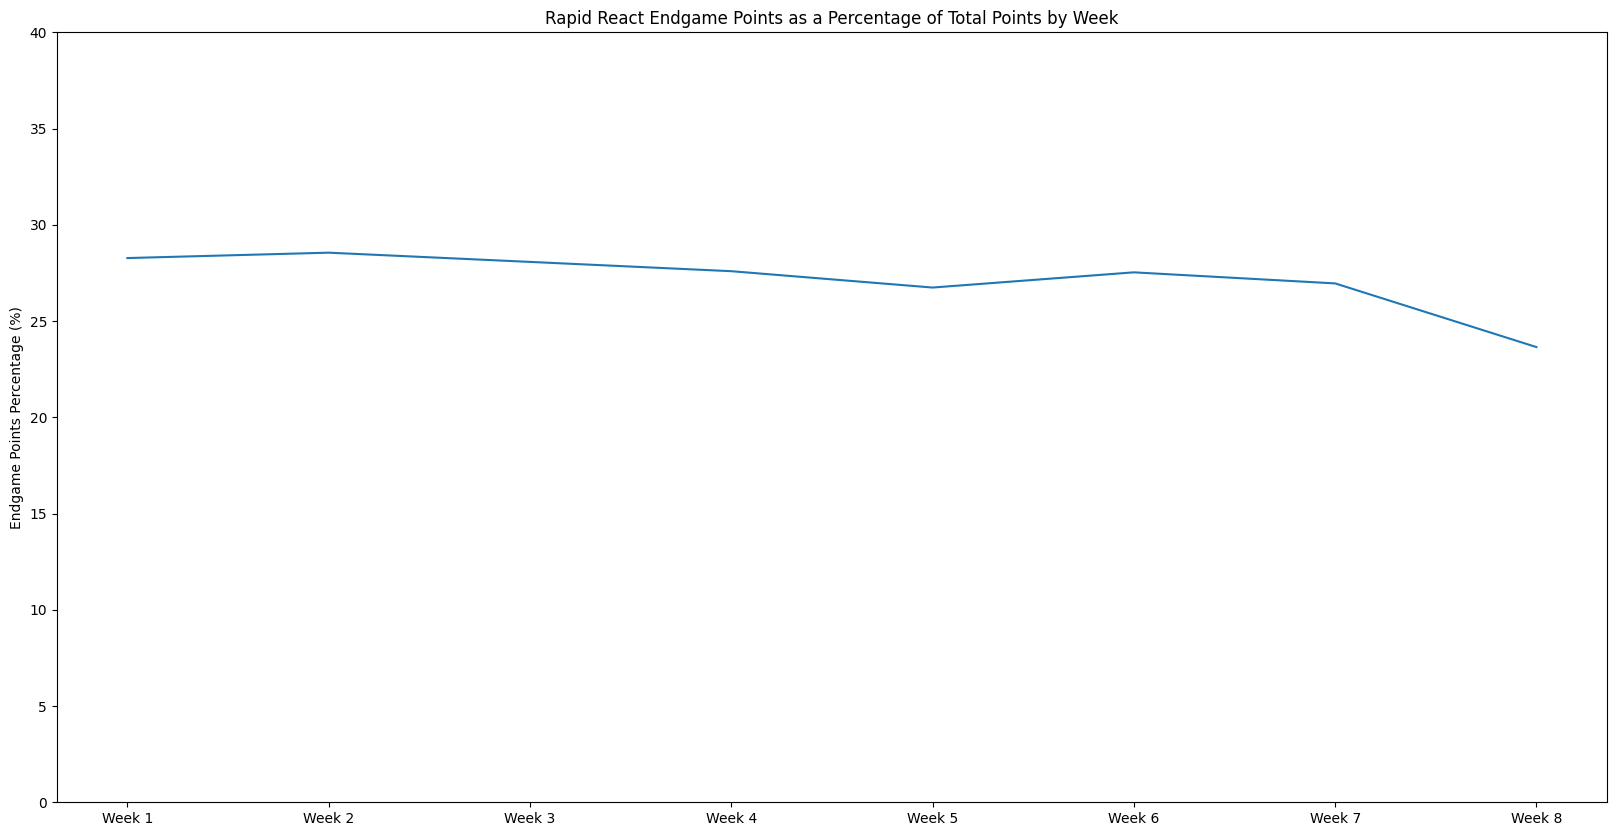

In [12]:
plt.rcParams['figure.figsize'] = (20, 10)

plt.plot([idx + 1 for idx, pts in enumerate(POINT_TOTAL_BY_WEEK) if pts], [endgame / total * 100 for endgame, total in zip(ENDGAME_POINTS_BY_WEEK, POINT_TOTAL_BY_WEEK) if total])
plt.title("Rapid React Endgame Points as a Percentage of Total Points by Week")
plt.xticks([idx + 1 for idx, pts in enumerate(POINT_TOTAL_BY_WEEK) if pts], [f"Week {idx + 1}" for idx, pts in enumerate(POINT_TOTAL_BY_WEEK) if pts])
plt.ylim((0, 40))
plt.ylabel("Endgame Points Percentage (%)")

In [13]:
POINT_TOTAL_BY_WEEK

[0, 231082, 274295, 377618, 162281, 417115, 0, 0, 0]